In [1]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
import glob

In [2]:
mpl.rcParams['font.size'] = 18
#%matplotlib notebook
#import matplotlib as mpl
import os
import sys
import math
from datetime import datetime
import time
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import seaborn as sb
import scipy
from scipy.optimize import curve_fit
#import sympy as sp
#from labellines import labelLine, labelLines
#from matplotlib.lines import Line2D

from scipy.optimize import curve_fit, leastsq
#import matplotlib.patches as patches

In [3]:
import tfs
data_frame = tfs.read('/Users/admin/Desktop/Cern_stuff/New_sim/twiss_ua9_2018_fl_no_sfx.tfs')

def read_file_trj(fname):
    columns = "NCASE IJ IONZ IONA PLA X Y Z TXX TYY TZZ WEIGHT LLOUSE ISAMPLE NEWREG NPASSAGE LTRACK ZLAST".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=1)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def read_file_flka(fname):
    columns = "XFLK YFLK ZFLK TXFLK TYFLK TZFLK PMOFLK TKEFLK".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=2)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
#    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def read_file_norm(fname):
    columns = "CSIB_X CSIBXP CSIB_Y CSIBYP CSIDSP".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=2)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
#    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def read_file_real(fname):
    columns = "XX XP YY YP PPART".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=2)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
#    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def loop_dir (basedir, pattern, fun, *args):

    pattern = basedir + '/' + pattern
    frames = []
    print (pattern)
    for i, fname in enumerate( glob.iglob(pattern) ):
        print (i,fname)

        if len(args) == 0:
            frame = fun(fname)
        elif len(args) == 1:
            frame = fun(fname, args[0])

        frame = frame.reset_index()
        frame['IFILE'] = i
        frame = frame.set_index(['IFILE','NCASE'])

        frames.append( frame )

    print("Files processed %d"%(len(frames)))
    if len(frames) == 0: return

    df = pd.concat(frames)
    print ("#", len(df))
    return df

def loop_dir_coord (basedir, pattern, fun, *args):

    pattern = basedir + '/' + pattern
    frames = []
    print (pattern)
    for i, fname in enumerate( glob.iglob(pattern) ):
        print (i,fname)

        if len(args) == 0:
            frame = fun(fname)
        elif len(args) == 1:
            frame = fun(fname, args[0])

        frame = frame.reset_index()
        frame['IFILE'] = i
        frame = frame.set_index(['IFILE',frame.index])

        frames.append( frame )

    print("Files processed %d"%(len(frames)))
    if len(frames) == 0: return

    df = pd.concat(frames)
    print ("#", len(df))
    return df

def read_file_cry(fname):
    columns = "NCASE JTRACK X Y ZSCO TXCRY TYCRY TZCRY CXTRCK CYTRCK INITX KICK PTOT DELTEN KCHNNL ISTATE NPASSAGE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0)
    
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    
    df['count'] = df.groupby(['NCASE'])['JTRACK'].transform('count')
    return df

def read_file_mgdrw(fname):
    columns = "NCASE JTRACK IZ IA XSCO YSCO ZSCO CXTRCK CYTRCK PTOT LTRACK NPASSAGE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0)
    
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    
    df['count'] = df.groupby(['NCASE'])['JTRACK'].transform('count')
    return df

def read_file_99(fname, sigma_res=0):
    columns = "NCASE ICODE ICRYST KCHNNL Z ANG0 ISTATE".split()
    #df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=1)
    
    #columns = "NCASE ICODE ICRYST KCHNNL Z ANG0 ISTATE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=1)
    
    
    #print(df)
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    #if sigma_res != 0:
     #   df['ANG0'] += np.random.normal(0, sigma_res, df.shape[0])
#         df['Y'] += np.random.normal(0, sigma_res, df.shape[0])

   # df['count'] = df.groupby(['NCASE'])['ICODE'].transform('count')
    return df
#	index	ICODE	ICRYST	KCHNNL	Z	ANG0	count

def read_file_98(fname, sigma_res=0):
    columns = "NCASE ICODE REG Z".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=None)
    #print(df)
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    #if sigma_res != 0:
     #   df['ANG0'] += np.random.normal(0, sigma_res, df.shape[0])
#         df['Y'] += np.random.normal(0, sigma_res, df.shape[0])

    #df['count'] = df.groupby(['NCASE'])['ICODE'].transform('count')
    return df
#	index	ICODE	ICRYST	KCHNNL	Z	ANG0	count

def read_file_96(fname, sigma_res=0):
    columns = "NCASE ICODE REG ETRACK Z".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=None)

    #df['count'] = df.groupby(['ICODE']).transform('count')
    return df

In [4]:
5470.320099999962-5466.13449999996282713

4.185599999998885

In [5]:
#dirname = '/Users/admin/Desktop/New_sim/TCSM_ext_geo_0110_2/run_*' 
#dirname = '/Users/admin/Desktop/New_sim/TCSM_primary_only/run_*'
#dirname = '/Users/admin/Desktop/New_sim/TCSM_prim_and_secondary/run_*'
#dirname = '/Users/admin/Desktop/New_sim/TCSM_prim_and_secondary_Z0/run_*'

#dirname = '/Users/admin/Desktop/New_sim/TCSM_secondary_changeTACW/run_*'

#dirname = '/Users/admin/Desktop/New_sim/TCSM_secondary_add97/run_*' #PART-THR: 250

#dirname = '/Users/admin/Desktop/New_sim/TCSM_secondary_add97_2/run_*'#PART-THR: 265

#dirname = '/Users/admin/Desktop/New_sim/TCSM_97_1210_1/run_*' #Latest

#dirname = '/Users/admin/Desktop/New_sim/TCSM_96_1310_2/run_*' #THIS ONE IS THE CORRECT FILE FOR TCSM IN, PART-THR 250



#NOW REDO SIMULATION FOR TACW/TCSM WITH PART-THR 200 GeV and do lossmaps
#dirname = '/Users/admin/Desktop/New_sim/TACW_THR200/run_*'
#dirname = '/Users/admin/Desktop/New_sim/TACW_THR200_Z_old/run_*'
#dirname = '/Users/admin/Desktop/New_sim/TCSM_THR200/run_*'


#dirname = '/Users/admin/Desktop/New_sim/TACW_THR200_Z_local/run_*'

#dirname = '/Users/admin/Desktop/New_sim/TCSM_THR200_Z/run_*'
dirname = '/Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_*'



#df_flk = loop_dir_coord(dirname,'lss5-double_exp001_flka_coord.dat',read_file_flka)
#df_nrm = loop_dir_coord(dirname,'lss5-double_exp001_norm_coord.dat',read_file_norm)

df_rea = loop_dir_coord(dirname,'lss5-double_exp001_real_coord.dat',read_file_real)
df_trj = loop_dir(dirname,'lss5-double_exp001_usrmed.dat',read_file_trj)

df_61 = loop_dir(dirname,'lss5-double_exp001_fort.61',read_file_mgdrw); #Exit crystal
df_60 = loop_dir(dirname,'lss5-double_exp001_fort.60',read_file_mgdrw); #Enter crystal
df_cry = loop_dir(dirname,'lss5-double_exp001_fort.51',read_file_cry);


df_99 = loop_dir(dirname,'lss5-double_exp001_fort.99',read_file_99) #NI CRY
df_98 = loop_dir(dirname,'lss5-double_exp001_fort.98',read_file_98) #NI absorber
df_96 = loop_dir(dirname,'lss5-double_exp001_fort.96',read_file_96)


#df_wht = loop_dir(dirname,'lss5-double_exp001_fort.24',read_file_mgdrw) can't read
df_40 = loop_dir(dirname,'lss5-double_exp001_fort.40',read_file_mgdrw) #Enter TCSM
df_41 = loop_dir(dirname,'lss5-double_exp001_fort.41',read_file_mgdrw) #Exit TCSM
df_42 = loop_dir(dirname,'lss5-double_exp001_fort.42',read_file_mgdrw) #Enter TACW 57 files, 72 rows
df_43 = loop_dir(dirname,'lss5-double_exp001_fort.43',read_file_mgdrw)

df_new = pd.merge(df_cry, df_trj,left_index=True, right_index=True, suffixes=('_cry','_usr'))
#df_new2 = pd.merge(df_98, df_trj,left_index=True, right_index=True, suffixes=('_98','_tcsm'))
#df_new3 = pd.merge(df_98, df_cry,left_index=True, right_index=True, suffixes=('_98','_cry'))

/Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_*/lss5-double_exp001_real_coord.dat
0 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_023/lss5-double_exp001_real_coord.dat
1 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_024/lss5-double_exp001_real_coord.dat
2 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_012/lss5-double_exp001_real_coord.dat
3 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_015/lss5-double_exp001_real_coord.dat
4 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_041/lss5-double_exp001_real_coord.dat
5 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_079/lss5-double_exp001_real_coord.dat
6 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_046/lss5-double_exp001_real_coord.dat
7 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_084/lss5-double_exp001_real_coord.dat
8 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_070/lss5-double_exp001

85 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_057/lss5-double_exp001_real_coord.dat
86 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_068/lss5-double_exp001_real_coord.dat
87 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_050/lss5-double_exp001_real_coord.dat
88 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_033/lss5-double_exp001_real_coord.dat
89 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_034/lss5-double_exp001_real_coord.dat
90 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_002/lss5-double_exp001_real_coord.dat
91 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_005/lss5-double_exp001_real_coord.dat
92 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_051/lss5-double_exp001_real_coord.dat
93 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_056/lss5-double_exp001_real_coord.dat
94 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_069/lss5

81 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_092/lss5-double_exp001_usrmed.dat
82 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_059/lss5-double_exp001_usrmed.dat
83 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_095/lss5-double_exp001_usrmed.dat
84 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_061/lss5-double_exp001_usrmed.dat
85 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_057/lss5-double_exp001_usrmed.dat
86 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_068/lss5-double_exp001_usrmed.dat
87 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_050/lss5-double_exp001_usrmed.dat
88 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_033/lss5-double_exp001_usrmed.dat
89 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_034/lss5-double_exp001_usrmed.dat
90 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_002/lss5-double_exp001_usrmed.dat
91 /Users/

71 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_017/lss5-double_exp001_fort.61
72 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_028/lss5-double_exp001_fort.61
73 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_021/lss5-double_exp001_fort.61
74 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_026/lss5-double_exp001_fort.61
75 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_019/lss5-double_exp001_fort.61
76 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_004/lss5-double_exp001_fort.61
77 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_003/lss5-double_exp001_fort.61
78 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_035/lss5-double_exp001_fort.61
79 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_032/lss5-double_exp001_fort.61
80 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_066/lss5-double_exp001_fort.61
81 /Users/admin/Desktop/Cern_stuff/New_s

63 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_072/lss5-double_exp001_fort.60
64 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_086/lss5-double_exp001_fort.60
65 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_081/lss5-double_exp001_fort.60
66 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_075/lss5-double_exp001_fort.60
67 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_088/lss5-double_exp001_fort.60
68 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_043/lss5-double_exp001_fort.60
69 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_044/lss5-double_exp001_fort.60
70 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_010/lss5-double_exp001_fort.60
71 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_017/lss5-double_exp001_fort.60
72 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_028/lss5-double_exp001_fort.60
73 /Users/admin/Desktop/Cern_stuff/New_s

53 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_074/lss5-double_exp001_fort.51
54 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_080/lss5-double_exp001_fort.51
55 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_087/lss5-double_exp001_fort.51
56 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_073/lss5-double_exp001_fort.51
57 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_027/lss5-double_exp001_fort.51
58 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_018/lss5-double_exp001_fort.51
59 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_020/lss5-double_exp001_fort.51
60 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_016/lss5-double_exp001_fort.51
61 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_029/lss5-double_exp001_fort.51
62 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_011/lss5-double_exp001_fort.51
63 /Users/admin/Desktop/Cern_stuff/New_s

4 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_041/lss5-double_exp001_fort.98
5 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_079/lss5-double_exp001_fort.98
6 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_046/lss5-double_exp001_fort.98
7 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_084/lss5-double_exp001_fort.98
8 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_070/lss5-double_exp001_fort.98
9 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_048/lss5-double_exp001_fort.98
10 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_077/lss5-double_exp001_fort.98
11 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_083/lss5-double_exp001_fort.98
12 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_014/lss5-double_exp001_fort.98
13 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_013/lss5-double_exp001_fort.98
14 /Users/admin/Desktop/Cern_stuff/New_sim/TAC

# 1119377
/Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_*/lss5-double_exp001_fort.96
0 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_023/lss5-double_exp001_fort.96
1 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_024/lss5-double_exp001_fort.96
2 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_012/lss5-double_exp001_fort.96
3 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_015/lss5-double_exp001_fort.96
4 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_041/lss5-double_exp001_fort.96
5 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_079/lss5-double_exp001_fort.96
6 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_046/lss5-double_exp001_fort.96
7 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_084/lss5-double_exp001_fort.96
8 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_070/lss5-double_exp001_fort.96
9 /Users/admin/Desktop/Cern_stuff/New_sim/TA

3 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_015/lss5-double_exp001_fort.42
4 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_041/lss5-double_exp001_fort.42
5 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_079/lss5-double_exp001_fort.42
6 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_046/lss5-double_exp001_fort.42
7 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_084/lss5-double_exp001_fort.42
8 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_070/lss5-double_exp001_fort.42
9 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_048/lss5-double_exp001_fort.42
10 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_077/lss5-double_exp001_fort.42
11 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_083/lss5-double_exp001_fort.42
12 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_014/lss5-double_exp001_fort.42
13 /Users/admin/Desktop/Cern_stuff/New_sim/TACW

94 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_069/lss5-double_exp001_fort.42
95 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_060/lss5-double_exp001_fort.42
96 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_094/lss5-double_exp001_fort.42
97 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_093/lss5-double_exp001_fort.42
98 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_067/lss5-double_exp001_fort.42
99 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_058/lss5-double_exp001_fort.42
Files processed 100
# 651680
/Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_*/lss5-double_exp001_fort.43
0 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_023/lss5-double_exp001_fort.43
1 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_024/lss5-double_exp001_fort.43
2 /Users/admin/Desktop/Cern_stuff/New_sim/TACW_final_extgeo/run_012/lss5-double_exp001_fort.43
3 /Users/admin/Desk

In [6]:
#fort.42 to check amount of particles: 
#40: 0, 41: 0, 42: 998371, 43: 1415 for TACW0 in. 1350 NI in cry, 1196593 NI in absorber

#40: 639471, 41: 113997, 42: 4, 43: 0 for TCSM in. 1315 NI in cry, 536292 NI in absorber
#The particles entering TCSM must have passed through the region TACW0 first, and yet only 4 appears in .42


#Impact Distribution for x on TACW, 

#df_40.loc[df_40['LTRACK']==1]
#df_41.loc[df_41['LTRACK']==1]
#df_42.loc[df_42['LTRACK']==1]
#df_43.loc[df_43['LTRACK']==1]
#df_98['ICODE'].value_counts()
len(df_60)

991467

In [7]:
df_98.loc[df_98['ICODE']==101,'REG'].value_counts()

328    650580
Name: REG, dtype: int64

In [8]:
#Particles in TACW1
df_98.loc[(df_98['ICODE']==101) & (df_98['Z']>5200)]

,,ICODE,REG,Z
IFILE,NCASE,,,
10,4761,101,328,11418.516977
14,7347,101,328,11423.304431
26,9704,101,328,11421.716460
28,2246,101,328,11414.736621
43,288,101,328,11415.442548
64,1757,101,328,11451.604346
67,3361,101,328,11450.463668
82,9632,101,328,11414.369188
91,7588,101,328,11441.418220


In [9]:
df_98['ICODE'].value_counts()

101    650580
100    468797
Name: ICODE, dtype: int64

In [10]:
df_96.loc[df_96['ICODE']==11,'REG'].value_counts()

328    650580
36       1300
Name: REG, dtype: int64

In [11]:
df_96[df_96['ICODE']==12]

,,ICODE,REG,ETRACK,Z
IFILE,NCASE,,,,
0,3557,12,328,167.259449,4951.304483
61,2650,12,328,121.494952,4947.415490


In [12]:
len(df_trj.loc[df_trj['LTRACK']==1]), len(df_96.loc[(df_96['ICODE']==11)&(df_96['REG']==328)]),\
len(df_96.loc[(df_96['ICODE']==11)&(df_96['REG']==36)]), len(df_96.loc[(df_96['ICODE']==12)])

(348118, 650580, 1300, 2)

In [13]:
len(df_trj.loc[df_trj['LTRACK']==1]), len(df_98.loc[df_98['ICODE']==101]), len(df_99.loc[df_99['ICODE']==101]),\
len(df_96.loc[(df_96['ICODE']==12)])

(348118, 650580, 1300, 2)

In [14]:
print('Amount of IE in absorber df_98 101, and df_96 IE in abosrber only')
len(df_98.loc[(df_98['ICODE']==101) & (df_98['REG']==328)]), len(df_96.loc[(df_96['ICODE']==11) & (df_96['REG']==328)])

Amount of IE in absorber df_98 101, and df_96 IE in abosrber only


(650580, 650580)

In [15]:
print('Amount of IE in crystal df_99 101, and df_96 IE in crystal only')
len(df_99.loc[(df_99['ICODE']==101)]), len(df_96.loc[(df_96['ICODE']==11) & (df_96['REG']==36)])

Amount of IE in crystal df_99 101, and df_96 IE in crystal only


(1300, 1300)

In [16]:
print('TACW0 in, USRMED primary + df_99 IE + df_98 IE + df_96 stopped particle')

len(df_trj.loc[df_trj['LTRACK']==1])+len(df_99.loc[df_99['ICODE']==101])+len(df_98.loc[df_98['ICODE']==101])\
+len(df_96[df_96['ICODE']==12])


TACW0 in, USRMED primary + df_99 IE + df_98 IE + df_96 stopped particle


1000000

In [17]:
len(df_99.loc[df_99['ISTATE']==3])
df_42

JTRACK  IZ  IA      XSCO      YSCO     ZSCO    CXTRCK  \
IFILE NCASE                                                          
0     1           1   1   1 -1.276137 -0.007734  4940.69 -0.000293   
      2           1   1   1 -1.255761 -0.086638  4940.69 -0.000290   
      3           1   1   1 -1.278620  0.041703  4940.69 -0.000296   
      4           1   1   1 -1.311380  0.016031  4940.69 -0.000305   
      5           1   1   1 -1.280645 -0.048601  4940.69 -0.000295   
...             ...  ..  ..       ...       ...      ...       ...   
99    9990        1   1   1 -1.271642 -0.012059  4940.69 -0.000294   
      9992        1   1   1 -1.271597  0.027426  4940.69 -0.000294   
      9994        1   1   1 -1.256147 -0.032441  4940.69 -0.000289   
      9996        1   1   1 -1.299632 -0.015358  4940.69 -0.000300   
      9999        1   1   1 -1.133875 -0.029272  4940.69 -0.000258   

                   CYTRCK       PTOT  LTRACK  NPASSAGE  count  
IFILE NCASE                                                    
0     1      2.441757e-06  269.99966       1         1      1  
      2      1.278855e-05  269.99974       1         1      1  
      3     -5.759749e-06  269.99977       1         1      1  
      4      5.212862e-06  269.99975       1         1      1  
      5      2.119103e-05  269.99955       1         1      1  
...                   ...        ...     ...       ...    ...  
99    9990   1.118675e-06  269.99983       1         1      1  
      9992  -2.143470e-05  269.99973       1         1      1  
      9994  -1.313034e-05  269.99977       1         1      1  
      9996  -2.545718e-08  269.99976       1         1      1  
      9999  -7.995750e-07  269.99967       1         1      1  

[651680 rows x 12 columns]

In [18]:
#When moving the TACW up in the opposite side of the collimator. The primaries hitting the TACW reduce to 6 
#and total amount of missing particles becomes 63
#Now the losses are not only in the TACW region but also at 4940.69

In [19]:
#_0110_2: 999721
#prim+secondary: 999721, missing 279
#prim_only: 999935, missing 65

#HAVING MODIFIED read_99 TO INCLUDE FIRST ELEMENT ALSO
#_0110_2: 999787 missing 213
#prim+secondary: 999787, missing 213
#prim_only: 1000000, missing 0

#HAVING MODIFIED read_99 AND read_98 TO INCLUDE FIRST ELEMENT ALSO
#_0110_2: 999931, missing 69
#prim+secondary: 999931, missing 69
#prim_only: 1000000, missing 0

Before we were missing 69 primaries. 

Turns out that the fort.42 we are producing (particles entering TACW) has 72 particles 11 of which are primaries, and they should not be there. They are all hitting in the region TACW51998 11411.975 - 11471.081.

We then retract both the TACW in the opposite direction so that it is further from the beamline (both from -0.07 to 0.14)

Now the same file has 14 particles with 6 primaries. 4 of them are hitting the TACW51797 and the 2 others together with the 8 secondaries the TACW51998 

So TACW51797 should have remained at -0.07 since there were no losses before. But the particles hitting the TACW51998 before are now just again unaccounted for.

I will move back TACW51797. Since we produce a fort.42 but not a fort.43 it means that the particles are entering TACW but not leaving. So they interact inside the TACW0 but they do not appear in the fort.98 which means that they must be interacting with a different interaction than 101/100.
Try to edit the code responsible for fort.98 to include more interactions:
Now there's in total more interactions in fort.98 buth they are spread out in 101/100/0 and fewer 101. 

Made edits to mgdraw. Removed TACW_JAW from USRINI so that they appear in the USRMED. Increased the particle threshold for stopping particles so they appear in a newly defined fort.97.
The fort.97 is not produced but some particles (neutrons) are being stopped as cen be read in the output file.
When using PART-THR = -250 GeV we get too many particles 1010717, and we produce some ICODE 0.

When using PART-THR = -265 GeV we get too few particles 999337, but we produce also ICODE 104/105 and no 0.
In both cases still no fort.97 produced. So raising the PART-THR means more particles are stopped but not stored. And these particles must be primaries according to fort.98 in mgdraw.

# All primaries found:
Having reduced PARTTHR to -200 GeV, first for TCSM we have all primaries in USRMED + fort.96 11 (inelastics).
For TACW 6 particles are stopped, and we have all primaries in USRMED + fort.96 11 + fort.96 12 (6).
Now we reproduce the lossmaps and add the losses in the map

In [20]:
#63 missing with changeTACW

#10717 too many with add_97: No 101 in TACW0, but now in USRMED PART-THR = -250 GeV
#663 missing with add_97_2: No 101 in TACW0, but now in USRMED PART-THR = -265 GeV

#Thus increasing PART-THR makes mores primaries disappear unaccounted for. Because there are 0 101 in TACW0 now.

In [21]:
df_trj['LTRACK'].value_counts()

1    348118
2       377
3        33
4         8
5         1
Name: LTRACK, dtype: int64

Text(0.5, 1.0, 'Energies of stopped primaries ICODE 11')

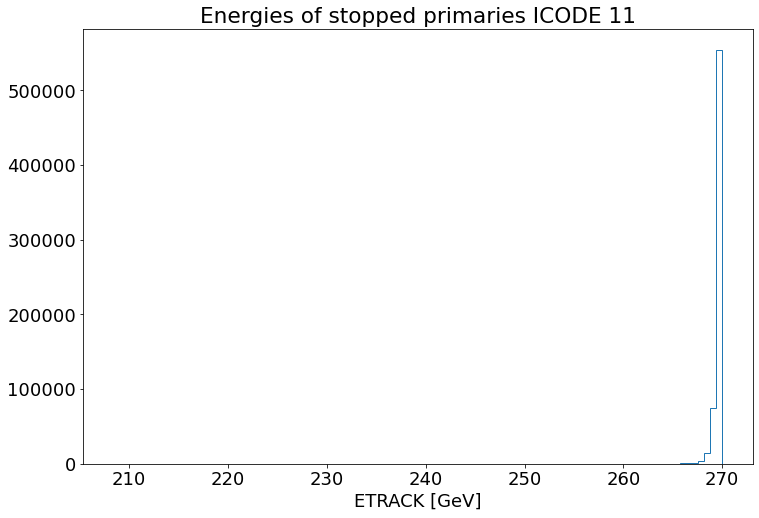

In [22]:
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(df_96.loc[df_96['ICODE']==11,'ETRACK'],bins=101,histtype='step');
plt.xlabel('ETRACK [GeV]')
plt.title('Energies of stopped primaries ICODE 11')

In [23]:
df_trj['LTRACK'].value_counts()

1    348118
2       377
3        33
4         8
5         1
Name: LTRACK, dtype: int64

In [24]:
np.sqrt(len(df_trj.loc[df_trj['LTRACK']==1,'Z'])), np.sqrt(len(df_98.loc[(df_98['ICODE']==101),'Z'])),np.sqrt(len(df_99.loc[df_99['ICODE']==101,'Z']))


np.ceil(np.log2(1300)) + 1



12.0

Number of NI in CRY: 1300

Number of NI in TACW0: 650580

Number of primaries in rest of aperture (excluding primaries reaching end of geo): 942

Number of secondaries: 377

Number of primaries reaching end of geometry: 347176


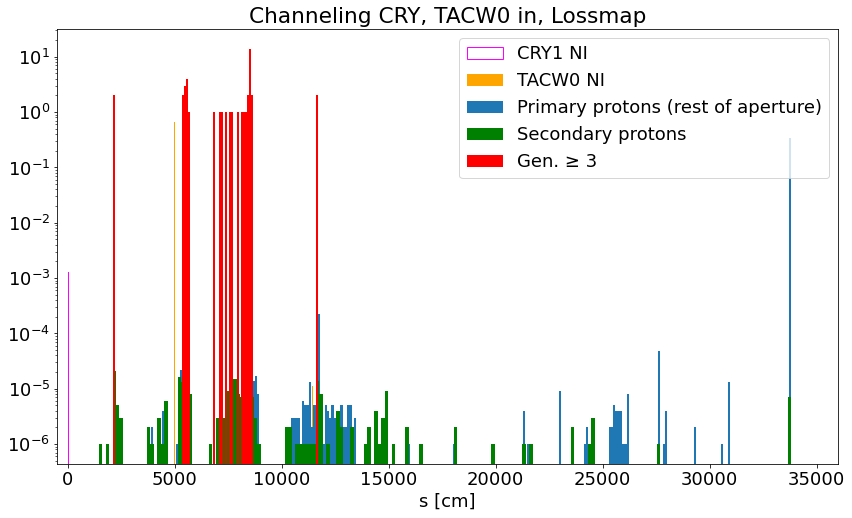

In [25]:
#TACW
fig2,ax=plt.subplots(figsize=(14,8))
#plt.hist(df_96.loc[df_96['ICODE']==11,'Z'],bins=201,label='Inelastic NI',color='magenta',log=True,histtype='bar',stacked=True);
#plt.hist(df_96.loc[df_96['ICODE']==12,'Z'],bins=1,color='red',log=True,histtype='step',stacked=True);

z1 = len(df_99.loc[df_99['ICODE']==101,'Z'])
w1 = np.full((z1),1/1e6)
plt.hist(df_99.loc[df_99['ICODE']==101,'Z'],bins=1,label='CRY1 NI',log=True,histtype='step',stacked=True,color='magenta',weights=w1);

z2 = len(df_98.loc[df_98['ICODE']==101,'Z'])
w2 = np.full((z2),1/1e6)
plt.hist(df_98.loc[(df_98['ICODE']==101),'Z'],bins=101,label='TACW0 NI',color='orange',log=True,histtype='bar',stacked=True,weights=w2);

z3 = len(df_trj.loc[df_trj['LTRACK']==1,'Z'])
w3 = np.full((z3),1/1e6)
plt.hist(df_trj.loc[df_trj['LTRACK']==1,'Z'],bins=301,label='Primary protons (rest of aperture)',log=True,histtype='bar',stacked=True,weights=w3);


z4 = len(df_trj.loc[df_trj['LTRACK']==2,'Z'])
w4 = np.full((z4),1/1e6)
plt.hist(df_trj.loc[df_trj['LTRACK']==2,'Z'],bins=201,label='Secondary protons',color='green',log=True,histtype='bar',stacked=True,weights=w4);

plt.hist(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'],bins=101,label='Gen. ≥ 3',color='red',log=True,histtype='bar',stacked=True);

#plt.hist(df_98.loc[(df_98['ICODE']==101) & (df_98['Z']>10000),'Z'],bins=1,label='TACW1 NI',color='black',log=True,histtype='bar',stacked=True);


plt.xlim(-500,36000)
plt.xlabel('s [cm]')
plt.title('Channeling CRY, TACW0 in, Lossmap')
plt.legend()

tot = len(df_trj.loc[df_trj['LTRACK']==1,'Z'])+len(df_96.loc[df_96['ICODE']==11,'Z'])+len(df_96.loc[df_96['ICODE']==12,'Z'])
#print(f'USRMED primaries (1694), USRMED secondaries (520), fort.96 ICODE11 (998300), fort.96 ICODE12 (6)')
#print('\nUSRMED primaries + fort.96 ICODE11 + fort.96 ICODE12:', tot)


prim_rest_geo = len(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['Z']>33000),'Z'])
print('Number of NI in CRY:',z1)
print('\nNumber of NI in TACW0:',z2)
print('\nNumber of primaries in rest of aperture (excluding primaries reaching end of geo):',z3-prim_rest_geo)
print('\nNumber of secondaries:',z4)
print('\nNumber of primaries reaching end of geometry:',prim_rest_geo)




In [26]:
S = data_frame['S']
DX = data_frame['DX']
DY = data_frame['DY']

Tungsten Absorber:

Number of NI in CRY: 1300

Number of NI in TACW0: 650580

Number of primaries in rest of aperture: 942

Number of Gen ≥ 2 particles: 419

Number of primaries reaching end of geometry: 347176


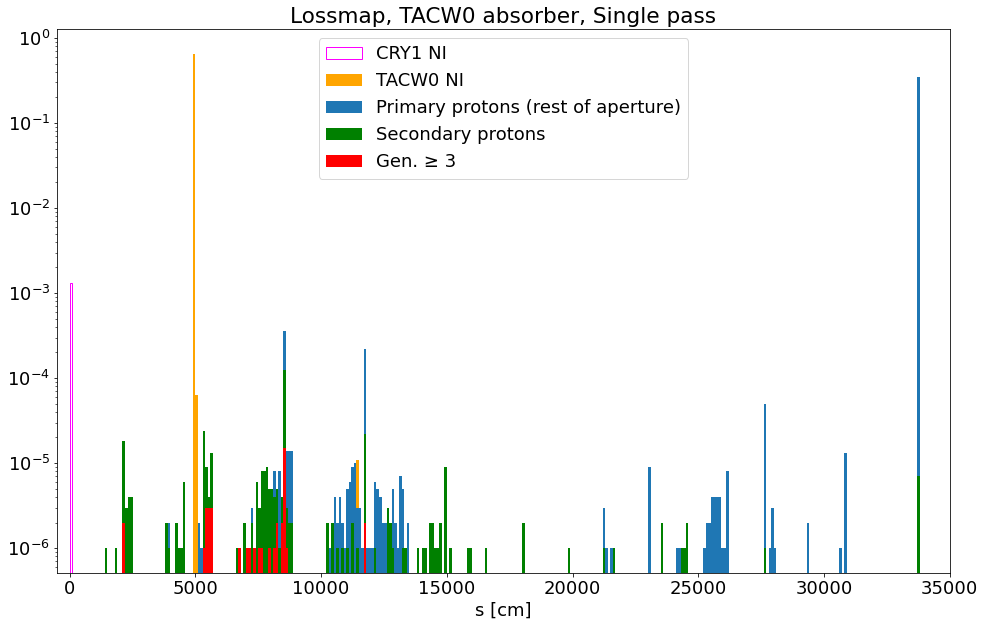

In [27]:
#TACW
fig_tacw, ax_1 = plt.subplots(figsize=(16,10))
#ax_2 = ax_1.twinx() 
#ax_2.plot((S-(5129.9275))*100,DX*0.01)
#ax_2.set_ylabel('[m]')

#plt.hist(df_96.loc[df_96['ICODE']==11,'Z'],bins=201,label='Inelastic NI',color='magenta',log=True,histtype='bar',stacked=True);
#plt.hist(df_96.loc[df_96['ICODE']==12,'Z'],bins=1,color='red',log=True,histtype='step',stacked=True);

bins = np.linspace(0,35000,351)

z1 = len(df_99.loc[df_99['ICODE']==101,'Z'])
w1 = np.full((z1),1/1e6)

N, bins, _ = ax_1.hist(df_99.loc[df_99['ICODE']==101,'Z'],bins=bins,label='CRY1 NI',log=True,histtype='step',stacked=True,color='magenta',weights=w1);
#print(bins[1]-bins[0])
z2 = len(df_98.loc[df_98['ICODE']==101,'Z'])
w2 = np.full((z2),1/1e6)

N2, bins2, _ =ax_1.hist(df_98.loc[(df_98['ICODE']==101),'Z'],bins=bins,label='TACW0 NI',color='orange',log=True,histtype='bar',stacked=True,weights=w2);
#print(bins2[1]-bins2[0])
z3 = len(df_trj.loc[df_trj['LTRACK']==1,'Z'])
w3 = np.full((z3),1/1e6)
ax_1.hist(df_trj.loc[df_trj['LTRACK']==1,'Z'],bins=bins,label='Primary protons (rest of aperture)',log=True,histtype='bar',stacked=True,weights=w3);


z4 = len(df_trj.loc[df_trj['LTRACK']==2,'Z'])
w4 = np.full((z4),1/1e6)
ax_1.hist(df_trj.loc[df_trj['LTRACK']==2,'Z'],bins=bins,label='Secondary protons',color='green',log=True,histtype='bar',stacked=True,weights=w4);

z5 = len(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'])
w5 = np.full((z5),1/1e6)
ax_1.hist(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'],bins=bins,label='Gen. ≥ 3',color='red',log=True,histtype='bar',stacked=True,weights=w5);

#plt.hist(df_98.loc[(df_98['ICODE']==101) & (df_98['Z']>10000),'Z'],bins=1,label='TACW1 NI',color='black',log=True,histtype='bar',stacked=True);
#blms=np.asarray([340, 3720, 5210, 9345, 9540, 11500, 18120, 24492])
#ax_1.vlines(blms,0,1e5, color='k',linestyles='dashed',label='BLM')

ax_1.set_xlim(-500,35000)
ax_1.set_xlabel('s [cm]')
ax_1.set_title('Lossmap, TACW0 absorber, Single pass')
ax_1.legend(loc='upper center')

tot = len(df_trj.loc[df_trj['LTRACK']==1,'Z'])+len(df_96.loc[df_96['ICODE']==11,'Z'])+len(df_96.loc[df_96['ICODE']==12,'Z'])
#print(f'USRMED primaries (1694), USRMED secondaries (520), fort.96 ICODE11 (998300), fort.96 ICODE12 (6)')
#print('\nUSRMED primaries + fort.96 ICODE11 + fort.96 ICODE12:', tot)

print('Tungsten Absorber:\n')
print('Number of NI in CRY:',z1)
print('\nNumber of NI in TACW0:',z2)
print('\nNumber of primaries in rest of aperture:',z3-prim_rest_geo)
print('\nNumber of Gen ≥ 2 particles:',z4+z5)
print('\nNumber of primaries reaching end of geometry:',len(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['Z']>33000),'Z']))

In [28]:
z5

42

In [29]:
len(df_98.loc[(df_98['ICODE']==101) & (df_98['Z']<10000),'Z'])/201, len(df_trj.loc[df_trj['LTRACK']==1,'Z'])/101, len(df_trj.loc[df_trj['LTRACK']==2,'Z'])

(3236.6616915422887, 3446.7128712871286, 377)

In [30]:
df_99

ICODE  ICRYST  KCHNNL         Z      ANG0  ISTATE
IFILE NCASE                                                   
0     64       101       1      -1  0.082536 -0.000011       2
      219      101       1      -1  0.033947  0.000011       2
      1543     101       1      -1  0.039921 -0.000010       1
      2224     101       1      -1  0.105979 -0.000002       2
      2397     101       1      -1  0.174846  0.000004       2
...            ...     ...     ...       ...       ...     ...
99    8539     101       1      -1  0.174037 -0.000011       1
      8816     100       1      -1  0.040018  0.000011       1
      9647     101       1      -1  0.111384  0.000015       0
      9733     101       1       2  0.011601  0.000003       3
      9848     100       1      -1  0.111191  0.000009       2

[1920 rows x 6 columns]

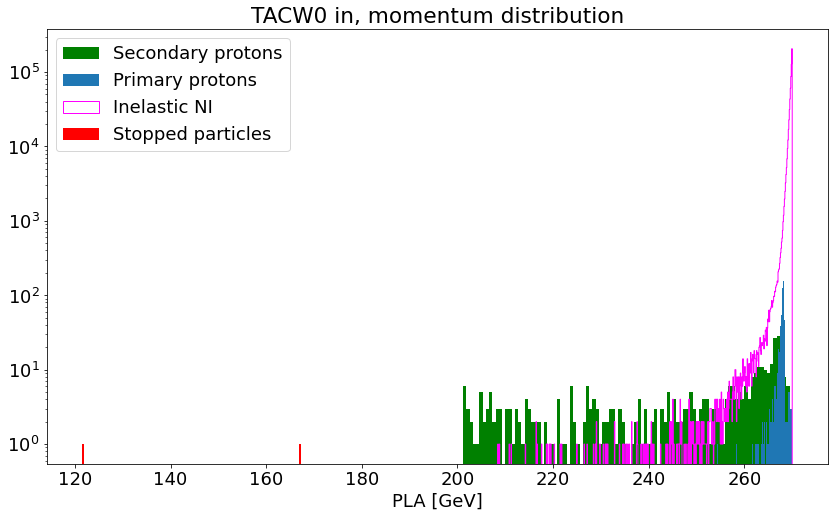

In [31]:
#TACW
fig,ax=plt.subplots(figsize=(14,8))
plt.hist(df_trj.loc[df_trj['LTRACK']==2,'PLA'],bins=101,label='Secondary protons',color='green',log=True,histtype='bar',stacked=True);
plt.hist(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['Z']<33000),'PLA'],bins=301,label='Primary protons',log=True,histtype='bar',stacked=True);

plt.hist(df_96.loc[df_96['ICODE']==11,'ETRACK'],bins=601,label='Inelastic NI',color='magenta',log=True,histtype='step',stacked=True);
plt.hist(df_96.loc[df_96['ICODE']==12,'ETRACK'],bins=101,label='Stopped particles',color='red',log=True,histtype='bar',stacked=True);

#plt.xlim(-500,28600)
plt.xlabel('PLA [GeV]')
plt.title('TACW0 in, momentum distribution')
plt.legend()

In [32]:
df_trj

IJ  IONZ  IONA         PLA            X         Y             Z  \
IFILE NCASE                                                                    
0     6       1     1     1  269.999430 -2294.384632  0.023677  33790.540947   
      9       1     1     1  269.999187 -2294.395084  0.015355  33790.538661   
      10      1     1     1  269.999371 -2294.399836  0.076821  33790.537621   
      12      1     1     1  269.999233 -2294.388133 -0.025712  33790.540181   
      27      1     1     1  269.999361 -2294.390090  0.015808  33790.539753   
...          ..   ...   ...         ...          ...       ...           ...   
99    9993    1     1     1  269.999365 -2294.399243 -0.040773  33790.537751   
      9995    1     1     1  269.999439 -2294.407841  0.055565  33790.535870   
      9997    1     1     1  269.999299 -2294.386823  0.025270  33790.540468   
      9998    1     1     1  269.999473 -2294.406468 -0.052963  33790.536171   
      10000   1     1     1  269.999210 -2294.385868  0.006188  33790.540677   

                  TXX       TYY       TZZ  WEIGHT  LLOUSE  ISAMPLE  NEWREG  \
IFILE NCASE                                                                  
0     6     -0.217772 -0.000001  0.976000     1.0       1        0     643   
      9     -0.217754  0.000003  0.976004     1.0       1        0     643   
      10    -0.217758  0.000033  0.976003     1.0       1        0     643   
      12    -0.217774 -0.000008  0.975999     1.0       1        0     643   
      27    -0.217784  0.000001  0.975997     1.0       1        0     643   
...               ...       ...       ...     ...     ...      ...     ...   
99    9993  -0.217768 -0.000004  0.976000     1.0       1        0     643   
      9995  -0.217762  0.000007  0.976002     1.0       1        0     643   
      9997  -0.217761  0.000010  0.976002     1.0       1        0     643   
      9998  -0.217775  0.000004  0.975999     1.0       1        0     643   
      10000 -0.217770  0.000012  0.976000     1.0       1        0     643   

             NPASSAGE  LTRACK         ZLAST  count  
IFILE NCASE                                         
0     6             1       1  33790.540947      1  
      9             1       1  33790.538661      1  
      10            1       1  33790.537621      1  
      12            1       1  33790.540181      1  
      27            1       1  33790.539753      1  
...               ...     ...           ...    ...  
99    9993          1       1  33790.537751      1  
      9995          1       1  33790.535870      1  
      9997          1       1  33790.540468      1  
      9998          1       1  33790.536171      1  
      10000         1       1  33790.540677      1  

[348537 rows x 18 columns]

In [33]:
df_trj['LTRACK'].value_counts()

1    348118
2       377
3        33
4         8
5         1
Name: LTRACK, dtype: int64

Text(0.5, 1.0, 'TACW0 in, momentum vs s for all particles in aperture')

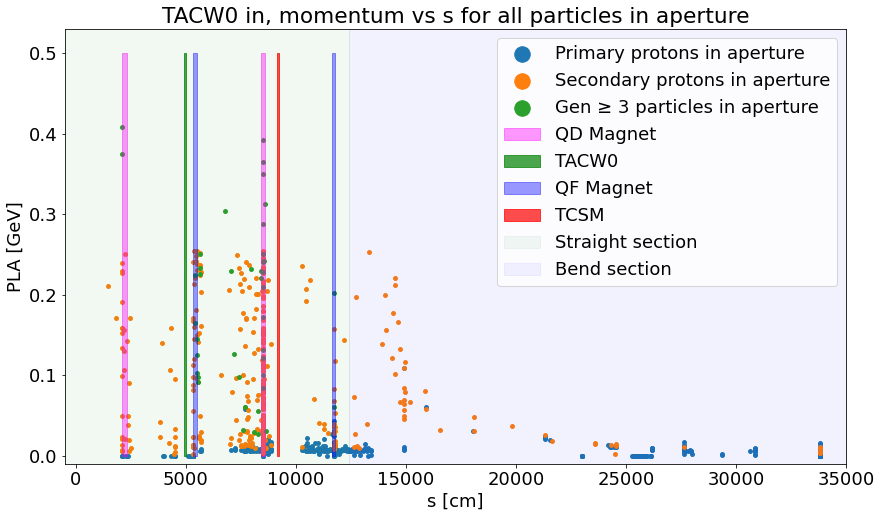

In [59]:
fig,ax=plt.subplots(figsize=(14,8))
plt.scatter(df_trj.loc[df_trj['LTRACK']==1,'Z'],1-df_trj.loc[df_trj['LTRACK']==1,'PLA']/270,s=15,label='Primary protons in aperture')
plt.scatter(df_trj.loc[df_trj['LTRACK']==2,'Z'],1-df_trj.loc[df_trj['LTRACK']==2,'PLA']/270,s=15,label='Secondary protons in aperture')
plt.scatter(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'],1-df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'PLA']/270,s=15,label='Gen ≥ 3 particles in aperture')


plt.fill_between([2100,2300], [0],[0.5], color='magenta', alpha=0.4,label='QD Magnet')
plt.fill_between([4930,5010], [0],[0.5], color='green', alpha=0.7,label='TACW0')
plt.fill_between([5300,5500], [0],[0.5], color='blue', alpha=0.4,label='QF Magnet')
plt.fill_between([8400,8600], [0],[0.5], color='magenta', alpha=0.4)
plt.fill_between([9150,9225], [0],[0.5], color='red', alpha=0.7,label='TCSM')
#plt.fill_between([11400,11485], [0],[0.5], color='red', alpha=0.4,label='TACW1')
plt.fill_between([11650,11750], [0],[0.5], color='blue', alpha=0.4)


#plt.fill_between([11700,15000], [270],[130], color='red', alpha=0.15,label='Start of bend (QF)')
plt.fill_between([-500,12400], [-0.03],[0.53], color='green', alpha=0.05,label='Straight section')
plt.fill_between([12400,40000], [-0.03],[0.53], color='blue', alpha=0.05,label='Bend section')

plt.xlim(-500,35000)
plt.ylim(-0.01,0.53)
plt.ylabel('PLA [GeV]')
plt.xlabel('s [cm]')
plt.legend(scatterpoints=1,markerscale=4,loc='upper right')

plt.title('TACW0 in, momentum vs s for all particles in aperture')

(11000.0, 12000.0)

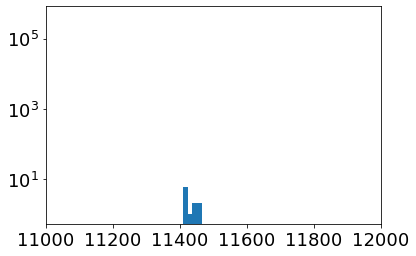

In [35]:
fig,ax = plt.subplots()
plt.hist(df_96.loc[(df_96['ICODE']==11),'Z'],bins=801,log=True);
plt.xlim(11000,12000)

In [36]:
merge_42 = pd.merge(df_cry, df_42,left_index=True, right_index=True,how='right', suffixes=('_cry','_tacw'))
print(len(merge_42), len(df_42))
merge_42.columns

651680 651680


Index(['JTRACK_cry', 'X', 'Y', 'ZSCO_cry', 'TXCRY', 'TYCRY', 'TZCRY',
       'CXTRCK_cry', 'CYTRCK_cry', 'INITX', 'KICK', 'PTOT_cry', 'DELTEN',
       'KCHNNL', 'ISTATE', 'NPASSAGE_cry', 'count_cry', 'JTRACK_tacw', 'IZ',
       'IA', 'XSCO', 'YSCO', 'ZSCO_tacw', 'CXTRCK_tacw', 'CYTRCK_tacw',
       'PTOT_tacw', 'LTRACK', 'NPASSAGE_tacw', 'count_tacw'],
      dtype='object')

In [37]:
df_cry['ISTATE'].value_counts(), len(merge_42.loc[(merge_42['ISTATE']==3)]), len(df_cry['ISTATE']), len(merge_42['ISTATE'])




( 3    628093
  1    163327
  2     96960
  0     51007
  5     50048
 -1       740
  4       105
 Name: ISTATE, dtype: int64,
 628103,
 990280,
 651680)

/var/folders/kc/46w6mj1x0h3807l6v8vm8z_c0000gn/T/ipykernel_57936/2464143757.py:9: RuntimeWarning: divide by zero encountered in true_divide
  ratio  = np.divide(hist_ch.T, hist.T)
/var/folders/kc/46w6mj1x0h3807l6v8vm8z_c0000gn/T/ipykernel_57936/2464143757.py:9: RuntimeWarning: invalid value encountered in true_divide
  ratio  = np.divide(hist_ch.T, hist.T)
/var/folders/kc/46w6mj1x0h3807l6v8vm8z_c0000gn/T/ipykernel_57936/2464143757.py:14: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(mappable=mesh)


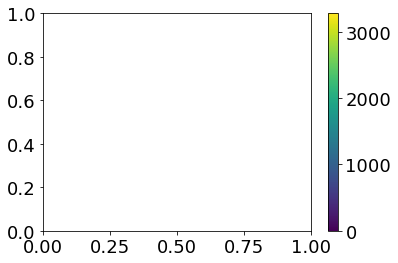

In [38]:
binx = np.linspace(min(df_42['XSCO']),max(df_42['XSCO']),60)
biny = np.linspace(min(merge_42.loc[merge_42['ISTATE']==2,'XSCO']),max(merge_42.loc[merge_42['ISTATE']==2,'XSCO']),60)


hist,_,_ = np.histogram2d(df_42['XSCO'].values,df_42['XSCO'].values,bins=(binx,binx),);
hist_ch,_,_ = np.histogram2d(merge_42.loc[merge_42['ISTATE']==2,'XSCO'].values,merge_42.loc[merge_42['ISTATE']==2,'XSCO'].values,bins=(biny,biny),);


ratio  = np.divide(hist_ch.T, hist.T)

X, Y = np.meshgrid(binx,biny)
mesh = ax.pcolormesh(X, Y, (ratio))

cbar = plt.colorbar(mappable=mesh) 

(-0.2, 0.2)

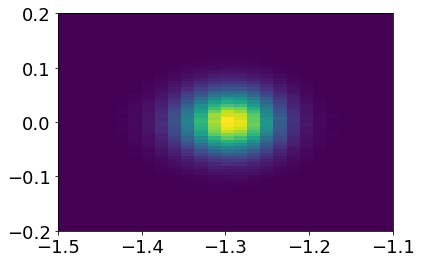

In [39]:
plt.hist2d(df_42['XSCO'],df_42['YSCO'],bins=901);
plt.xlim(-1.5,-1.1)
plt.ylim(-0.2,0.2)

Text(0.5, 1.0, 'Impact distribution TCSM')

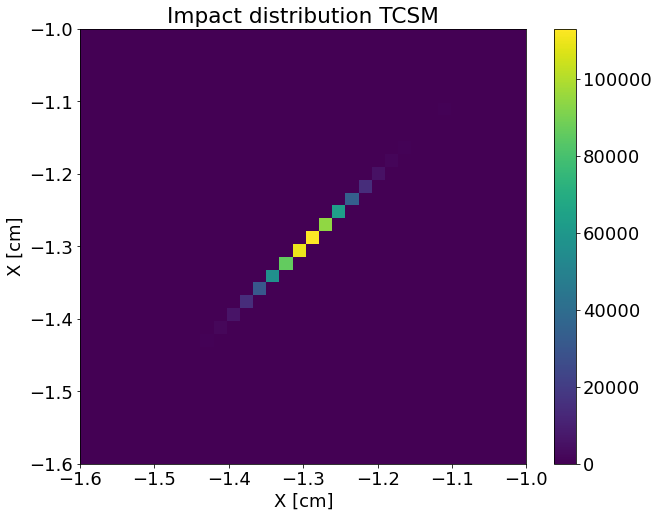

In [40]:
#For TCSM
fig,ax=plt.subplots(figsize=(10,8))
plt.hist2d(df_42['XSCO'],df_42['XSCO'],bins=801, cmap=plt.cm.viridis);
plt.colorbar()
#plt.pcolormesh((df_40['XSCO'],df_40['XSCO']))
#mesh = ax.pcolormesh(X, Y, (ratio))


plt.xlim(-1.6,-1)
plt.ylim(-1.6,-1)
plt.xlabel('X [cm]')
plt.ylabel('X [cm]')
plt.title('Impact distribution TCSM')

Text(0.5, 1.0, 'Impact distribution X TACW0')

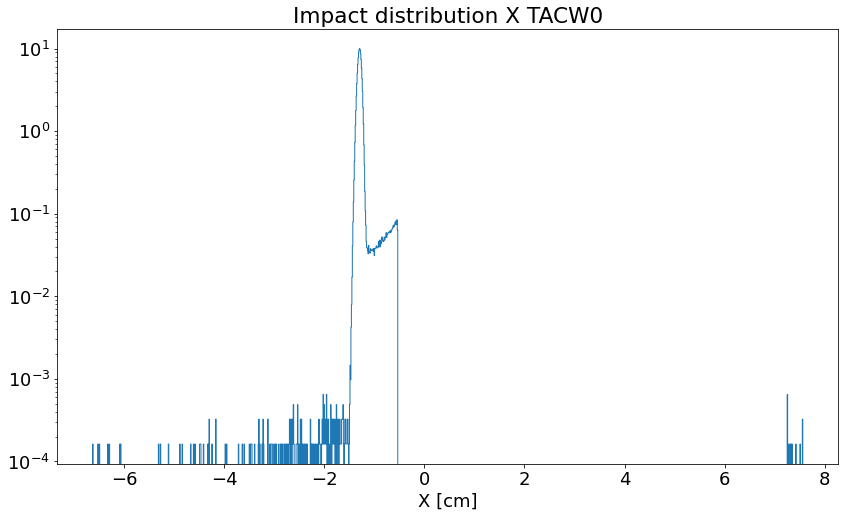

In [41]:
fig,ax=plt.subplots(figsize=(14,8))
plt.hist(df_42['XSCO'],bins=1501,histtype='step',density=True,log=True);
#plt.xlim(-1,-0.6)

plt.xlabel('X [cm]')
plt.title('Impact distribution X TACW0')

In [42]:
#Change binnings so the same binsize. Means amount of bins the same relative to population of each ISTATE. 
merge_42['ISTATE'].value_counts()

 3.0    628103
 2.0     23060
-1.0       285
 4.0       105
 1.0        87
 5.0        19
 0.0        13
Name: ISTATE, dtype: int64

In [43]:
len(merge_42.loc[merge_42['ISTATE']==3]), len(merge_42.loc[merge_42['ISTATE']==2])/147, 385/21

(628103, 156.87074829931973, 18.333333333333332)

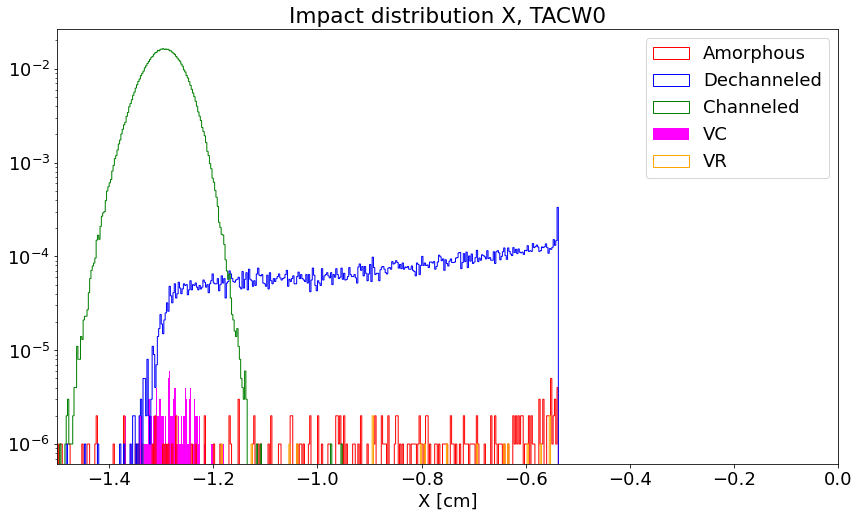

In [44]:
fig,ax =plt.subplots(figsize=(14,8))
impact_bins = np.linspace(-1.5,0.0,601)

z1 = len(merge_42.loc[(merge_42['ISTATE']==-1) | (merge_42['ISTATE']==0) | (merge_42['ISTATE']==1),'XSCO'])
w1 = np.full((z1),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==-1) | (merge_42['ISTATE']==0) | (merge_42['ISTATE']==1),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='red',label='Amorphous',weights=w1);

z2 = len(merge_42.loc[(merge_42['ISTATE']==2),'XSCO'])
w2 = np.full((z2),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==2),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='blue',label='Dechanneled',weights=w2);

z3 = len(merge_42.loc[(merge_42['ISTATE']==3),'XSCO'])
w3 = np.full((z3),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==3),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='green',label='Channeled',weights=w3);

z4 = len(merge_42.loc[(merge_42['ISTATE']==4),'XSCO'])
w4 = np.full((z4),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==4),'XSCO'],bins=impact_bins,histtype='bar',stacked=True,log=True,color='magenta',label='VC',weights=w4);

z5 = len(merge_42.loc[(merge_42['ISTATE']==5),'XSCO'])
w5 = np.full((z5),1/1e6)
plt.hist(merge_42.loc[(merge_42['ISTATE']==5),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='orange',label='VR',weights=w5);

plt.xlim(-1.5,0.0)

plt.xlabel('X [cm]')
plt.title('Impact distribution X, TACW0')
plt.legend();

In [45]:
merge_42['ISTATE'].value_counts()

 3.0    628103
 2.0     23060
-1.0       285
 4.0       105
 1.0        87
 5.0        19
 0.0        13
Name: ISTATE, dtype: int64

In [46]:
[len(merge_42.loc[merge_42['ISTATE']==i])/len(merge_42['ISTATE'])*100 for i in range(-1,6)]

[0.04373312054996317,
 0.001994844095261478,
 0.01335011048367297,
 3.5385465259022837,
 96.38212005892463,
 0.016112202307881168,
 0.002915541369997545]

In [47]:
0.04373312054996317+0.001994844095261478+0.01335011048367297

0.059078075128897616

In [48]:
#The particles with X > 0 are hitting the TACW1

Text(0.5, 1.0, 'Impact distribution X TACW0')

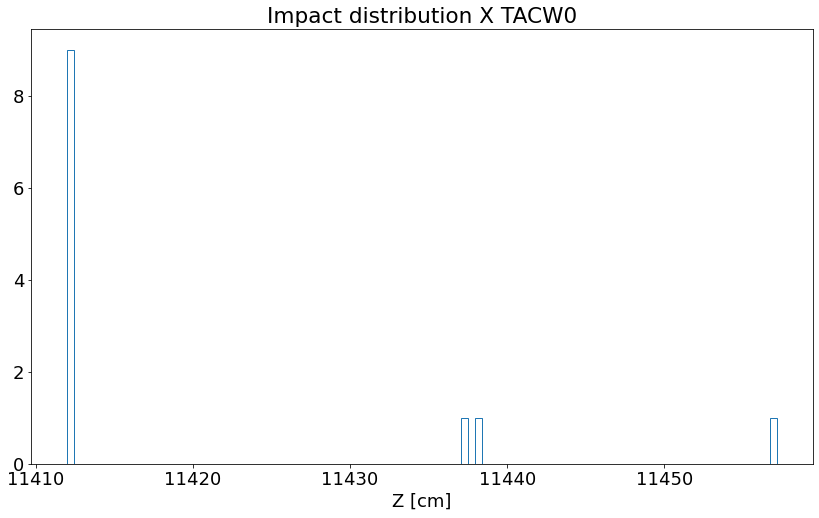

In [49]:
fig,ax =plt.subplots(figsize=(14,8))

plt.hist(merge_42.loc[merge_42['XSCO']>0,'ZSCO_tacw'],bins=101,histtype='step',stacked=True,label=1);

plt.xlabel('Z [cm]')
plt.title('Impact distribution X TACW0')



In [50]:
merge_42.loc[merge_42['XSCO']>0]

,,JTRACK_cry,X,Y,ZSCO_cry,TXCRY,TYCRY,TZCRY,CXTRCK_cry,CYTRCK_cry,INITX,...,IA,XSCO,YSCO,ZSCO_tacw,CXTRCK_tacw,CYTRCK_tacw,PTOT_tacw,LTRACK,NPASSAGE_tacw,count_tacw
IFILE,NCASE,,,,,,,,,,,,,,,,,,,,,
10,4761,1.0,-0.252767,-0.016532,97.300004,0.000053,0.000008,1.0,-0.000121,0.000008,7.904673e-07,...,1,7.509955,1.133255,11411.975,0.001908,-0.000121,268.10998,1,1,2
11,2079,1.0,-0.253449,0.000430,97.300003,0.000055,0.000015,1.0,-0.000115,0.000015,3.168088e-06,...,1,7.256184,-2.016204,11411.975,0.001864,0.000239,257.71508,2,1,2
14,7347,1.0,-0.268060,-0.067531,97.300003,0.000054,-0.000023,1.0,-0.000107,-0.000023,2.374834e-06,...,1,7.559376,-0.291177,11411.975,0.001915,0.000047,267.73980,1,1,2
26,9704,1.0,-0.262991,0.015966,97.300001,0.000042,0.000001,1.0,-0.000004,0.000008,-1.006119e-05,...,1,7.421565,2.058038,11411.975,0.001790,-0.000212,269.52498,1,1,2
28,2246,1.0,-0.252717,0.024588,97.300002,0.000044,0.000012,1.0,-0.000113,0.000012,-7.866156e-06,...,1,7.284108,0.201827,11411.975,0.001850,-0.000034,268.32959,1,1,2
43,288,1.0,-0.252327,-0.034976,97.300001,0.000046,-0.000018,1.0,-0.000115,-0.000018,-5.328140e-06,...,1,7.345631,-0.518637,11411.975,0.001869,0.000065,267.33440,1,1,2
64,1757,1.0,-0.276292,0.026815,97.300004,0.000047,0.000004,1.0,-0.000108,0.000004,-4.997168e-06,...,1,7.327044,1.820036,11411.975,0.001862,-0.000197,267.63197,1,1,2
67,3361,1.0,-0.253246,0.083957,97.300001,0.000051,0.000033,1.0,-0.000108,0.000033,-1.068221e-06,...,1,7.250000,1.701726,11437.447,0.001830,-0.000205,267.37890,1,1,2
82,9632,1.0,-0.265889,0.041844,97.300002,0.000054,0.000024,1.0,-0.000101,0.000024,2.436671e-06,...,1,7.305952,2.422929,11411.975,0.001849,-0.000269,267.97393,1,1,2


In [51]:
merge_42.columns

Index(['JTRACK_cry', 'X', 'Y', 'ZSCO_cry', 'TXCRY', 'TYCRY', 'TZCRY',
       'CXTRCK_cry', 'CYTRCK_cry', 'INITX', 'KICK', 'PTOT_cry', 'DELTEN',
       'KCHNNL', 'ISTATE', 'NPASSAGE_cry', 'count_cry', 'JTRACK_tacw', 'IZ',
       'IA', 'XSCO', 'YSCO', 'ZSCO_tacw', 'CXTRCK_tacw', 'CYTRCK_tacw',
       'PTOT_tacw', 'LTRACK', 'NPASSAGE_tacw', 'count_tacw'],
      dtype='object')

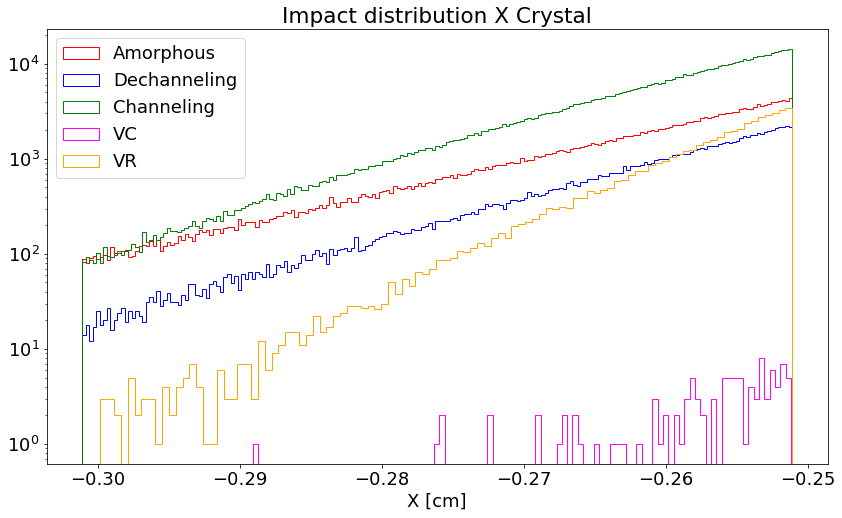

In [52]:
fig,ax =plt.subplots(figsize=(14,8))
#for i in range(-1,5):
 #   plt.hist(df_cry.loc[df_cry['ISTATE']==i,'X'],bins=201,histtype='step',stacked=True,log=True,label=i);
    
plt.hist(df_cry.loc[(df_cry['ISTATE']==-1) | (df_cry['ISTATE']==0) | (df_cry['ISTATE']==1),'X'],bins=201,histtype='step',stacked=True,log=True,color='red',label='Amorphous')
plt.hist(df_cry.loc[df_cry['ISTATE']==2,'X'],bins=201,histtype='step',stacked=True,log=True,color='blue',label='Dechanneling')
plt.hist(df_cry.loc[df_cry['ISTATE']==3,'X'],bins=201,histtype='step',stacked=True,log=True,color='green',label='Channeling')
plt.hist(df_cry.loc[df_cry['ISTATE']==4,'X'],bins=101,histtype='step',stacked=True,log=True,color='magenta',label='VC')
plt.hist(df_cry.loc[df_cry['ISTATE']==5,'X'],bins=101,histtype='step',stacked=True,log=True,color='orange',label='VR')



plt.xlabel('X [cm]')
plt.title('Impact distribution X Crystal')
plt.legend(loc='upper left');

In [53]:
df_cry['ISTATE'].value_counts()

 3    628093
 1    163327
 2     96960
 0     51007
 5     50048
-1       740
 4       105
Name: ISTATE, dtype: int64

In [54]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

(-15.0, 15.0)

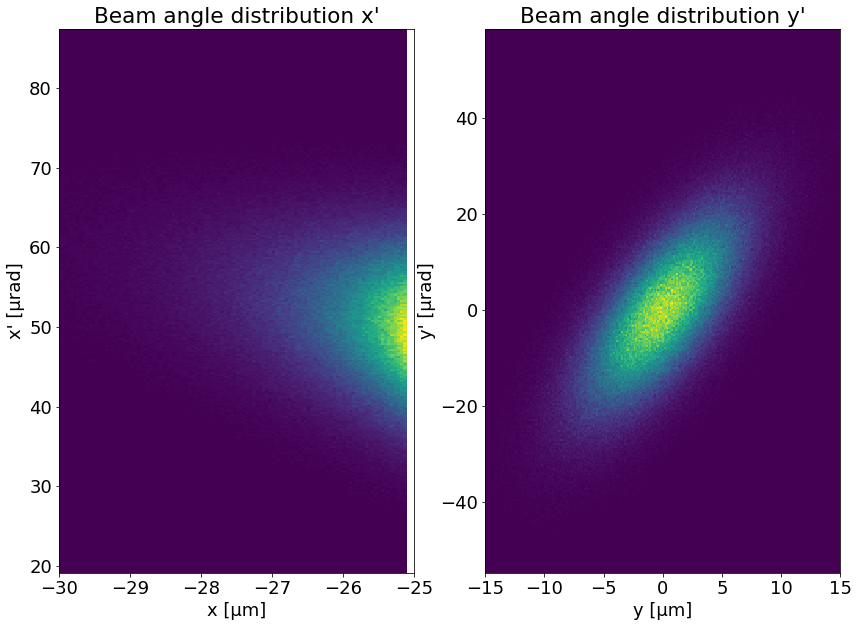

In [55]:
#in microns
fig,ax=plt.subplots(1,2,figsize=(14,10))
ax[0].hist2d(df_rea['XX']*10000,df_rea['XP']*1e6,bins=301);
ax[0].set_xlabel('x [µm]')
ax[0].set_ylabel('x\' [µrad]')
ax[0].set_title('Beam angle distribution x\'')
ax[0].set_xlim(-30,-25)

ax[1].hist2d(df_rea['YY']*10000,df_rea['YP']*1e6,bins=301);
ax[1].set_xlabel('y [µm]')
ax[1].set_ylabel('y\' [µrad]')
ax[1].set_title('Beam angle distribution y\'')

plt.xlim(-15,15)

(-15.0, 15.0)

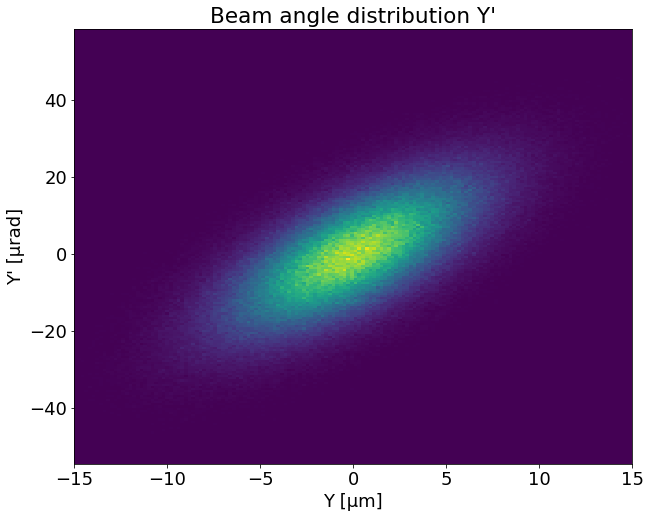

In [56]:
#in microns
fig,ax=plt.subplots(figsize=(10,8))
plt.hist2d(df_rea['YY']*10000,df_rea['YP']*1e6,bins=201);
plt.xlabel('Y [µm]')
plt.ylabel('Y\' [µrad]')
plt.title('Beam angle distribution Y\'')

plt.xlim(-15,15)

Text(0.5, 1.0, "Beam angle distribution x'")

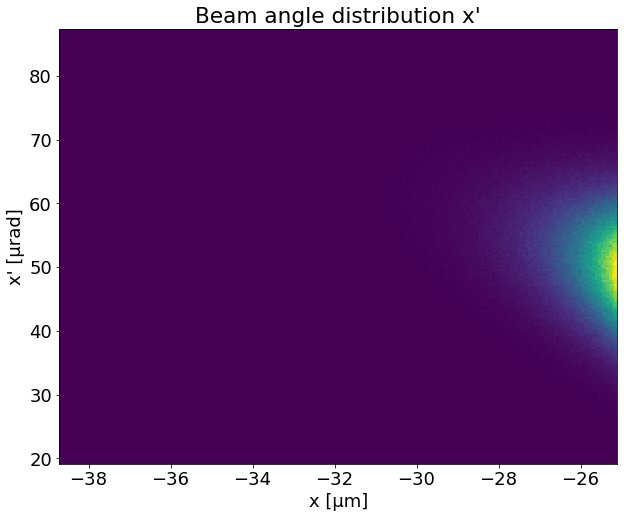

In [57]:
#in microns
fig,ax=plt.subplots(figsize=(10,8))
plt.hist2d(df_rea['XX']*10000,df_rea['XP']*1e6,bins=201);
plt.xlabel('x [µm]')
plt.ylabel('x\' [µrad]')
plt.title('Beam angle distribution x\'')

#plt.xlim(-15,15)